In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
data = pd.read_csv('D:/aiml/good.csv')
data

,Height,Weight,colour,Age
0,2.0,3.0,Red,2
1,6.0,8.0,Black,10
2,NaN,NaN,Black,6
3,4.0,NaN,Brown,7
4,8.0,12.0,Black,4
5,3.0,4.0,NaN,1
6,4.0,4.0,green,2
7,1.0,1.0,NaN,3


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  7 non-null      float64
 1   Weight  6 non-null      float64
 2   colour  6 non-null      object 
 3   Age     8 non-null      int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 384.0+ bytes


In [101]:
data.isnull()

,Height,Weight,colour,Age
0,False,False,False,False
1,False,False,False,False
2,True,True,False,False
3,False,True,False,False
4,False,False,False,False
5,False,False,True,False
6,False,False,False,False
7,False,False,True,False


In [102]:
data.dropna()

,Height,Weight,colour,Age
0,2.0,3.0,Red,2
1,6.0,8.0,Black,10
4,8.0,12.0,Black,4
6,4.0,4.0,green,2


In [103]:
data.fillna(1)

,Height,Weight,colour,Age
0,2.0,3.0,Red,2
1,6.0,8.0,Black,10
2,1.0,1.0,Black,6
3,4.0,1.0,Brown,7
4,8.0,12.0,Black,4
5,3.0,4.0,1,1
6,4.0,4.0,green,2
7,1.0,1.0,1,3


In [104]:
data['Height'].fillna(data['Height'].mean(),inplace=True)
data

,Height,Weight,colour,Age
0,2.0,3.0,Red,2
1,6.0,8.0,Black,10
2,4.0,NaN,Black,6
3,4.0,NaN,Brown,7
4,8.0,12.0,Black,4
5,3.0,4.0,NaN,1
6,4.0,4.0,green,2
7,1.0,1.0,NaN,3


In [109]:
data['colour'].fillna(data['colour'].mode(),inplace=True)
data

,Height,Weight,colour,Age
0,2.0,3.0,Red,2
1,6.0,8.0,Black,10
2,4.0,NaN,Black,6
3,4.0,NaN,Brown,7
4,8.0,12.0,Black,4
5,3.0,4.0,NaN,1
6,4.0,4.0,green,2
7,1.0,1.0,NaN,3


{'whiskers': [<matplotlib.lines.Line2D at 0x17b422a19a0>,
 'caps': [<matplotlib.lines.Line2D at 0x17b422a1f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x17b422a16d0>],
 'medians': [<matplotlib.lines.Line2D at 0x17b422b0520>],
 'fliers': [<matplotlib.lines.Line2D at 0x17b422b07f0>],
 'means': []}

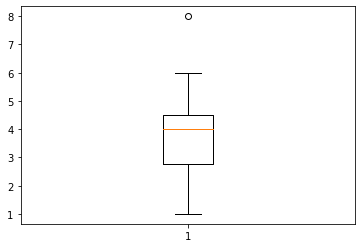

In [106]:
plt.boxplot(data['Height'])

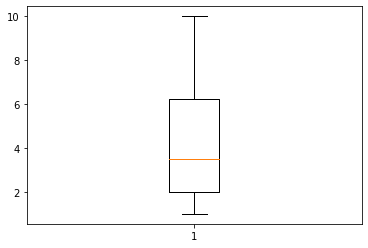

In [107]:
for i in data['Age']:
    q1=data['Age'].quantile(0.25)
    q3=data['Age'].quantile(0.75)
    iqr=q3-q1
    lower_tail=q1 - 1.5*iqr
    upper_tail=q3 + 1.5*iqr
    if i>upper_tail or i<lower_tail:
        data['Age']=data['Age'].replace(i,np.mean(data['Age']))
plt.boxplot(data['Age'])
plt.show()

In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data[['Height','Age']]) 
data_normalized = scaler.transform(data[['Height','Age']])
data_normalized


array([[-0.9701425 , -0.827653  ],
       [ 0.9701425 ,  1.96023079],
       [ 0.        ,  0.56628889],
       [ 0.        ,  0.91477437],
       [ 1.940285  , -0.13068205],
       [-0.48507125, -1.17613847],
       [ 0.        , -0.827653  ],
       [-1.45521375, -0.47916753]])

In [110]:
data_normalized=pd.DataFrame(data_normalized,columns=['Height','Age'])
data_normalized=data_normalized.join(data[data.columns.drop(['Height','Age'])])
data_normalized  

,Height,Age,Weight,colour
0,-0.970143,-0.827653,3.0,Red
1,0.970143,1.960231,8.0,Black
2,0.000000,0.566289,NaN,Black
3,0.000000,0.914774,NaN,Brown
4,1.940285,-0.130682,12.0,Black
5,-0.485071,-1.176138,4.0,NaN
6,0.000000,-0.827653,4.0,green
7,-1.455214,-0.479168,1.0,NaN


In [114]:
data =pd.get_dummies(data,columns=['Height'])
data

,colour,Age,Weight_1.0,Weight_3.0,Weight_4.0,Weight_8.0,Weight_12.0,Height_1.0,Height_2.0,Height_3.0,Height_4.0,Height_6.0,Height_8.0
0,Red,2,0,1,0,0,0,0,1,0,0,0,0
1,Black,10,0,0,0,1,0,0,0,0,0,1,0
2,Black,6,0,0,0,0,0,0,0,0,1,0,0
3,Brown,7,0,0,0,0,0,0,0,0,1,0,0
4,Black,4,0,0,0,0,1,0,0,0,0,0,1
5,NaN,1,0,0,1,0,0,0,0,1,0,0,0
6,green,2,0,0,1,0,0,0,0,0,1,0,0
7,NaN,3,1,0,0,0,0,1,0,0,0,0,0


(array([1., 2., 1., 1., 0., 1., 1., 0., 0., 1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

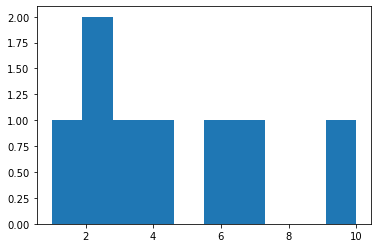

In [115]:
plt.hist(data['Age'])

In [119]:
data['bins']=pd.cut(x=data['Age'],bins=[1,2,3,4,5],labels=['1 to 2','2 to 3','3 to 4','4 to 5'])
print(data)
print(data['bins'].unique())

  colour  Age  Weight_1.0  Weight_3.0  Weight_4.0  Weight_8.0  Weight_12.0  \
0    Red    2           0           1           0           0            0   
1  Black   10           0           0           0           1            0   
2  Black    6           0           0           0           0            0   
3  Brown    7           0           0           0           0            0   
4  Black    4           0           0           0           0            1   
5    NaN    1           0           0           1           0            0   
6  green    2           0           0           1           0            0   
7    NaN    3           1           0           0           0            0   

   Height_1.0  Height_2.0  Height_3.0  Height_4.0  Height_6.0  Height_8.0  \
0           0           1           0           0           0           0   
1           0           0           0           0           1           0   
2           0           0           0           1           0     